In [1]:
import pandas as pd

https://www.encodeproject.org/experiments/ENCSR683ORH/

In [ ]:
!zcat ENCFF066CSA.bed.gz | cut -f1-5 > H3F3A.ENCFF066CSA_hg19.bed
!zcat ENCFF343MZY.bed.gz | cut -f1-5 > H3F3A.ENCFF066CSA_hg19.bed

In [17]:
df1 = pd.read_csv("H3F3A.ENCFF066CSA_hg19.bed", header=None, sep='\t')
df2 = pd.read_csv("H3F3A.ENCFF343MZY_hg19.bed", header=None, sep='\t')

In [18]:
header = ['chrom', 'start', 'end', 'name', 'score']
df1.columns = header[:len(df1.columns)]
df2.columns = header[:len(df2.columns)]

In [19]:
df1['len'] = df1['end'] - df1['start']
df2['len'] = df2['end'] - df2['start']

In [20]:
df2

,chrom,start,end,name,score,len
0,chr1,121485150,121485355,Peak_1,1000,205
1,chr10,42596898,42597182,Peak_2,552,284
2,chr10,42599598,42600060,Peak_3,507,462
3,chr10,42384994,42385318,Peak_4,414,324
4,chr8,144751291,144752020,Peak_5,208,729
...,...,...,...,...,...,...
314856,chr17,58036078,58036529,Peak_314857,10,451
314857,chr10,7796717,7796897,Peak_314858,10,180
314858,chr4,159587666,159587962,Peak_314859,10,296
314859,chr5,134189271,134189471,Peak_314860,10,200


In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

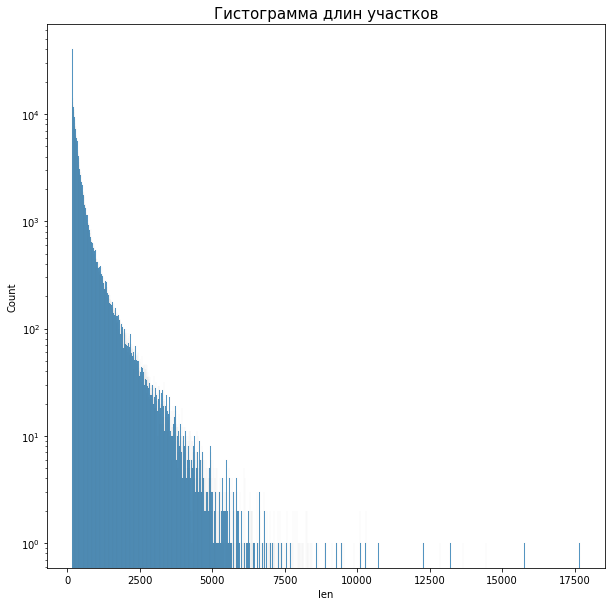

In [22]:
sns.histplot(df1['len']).set(yscale='log')
plt.title("Гистограмма длин участков", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

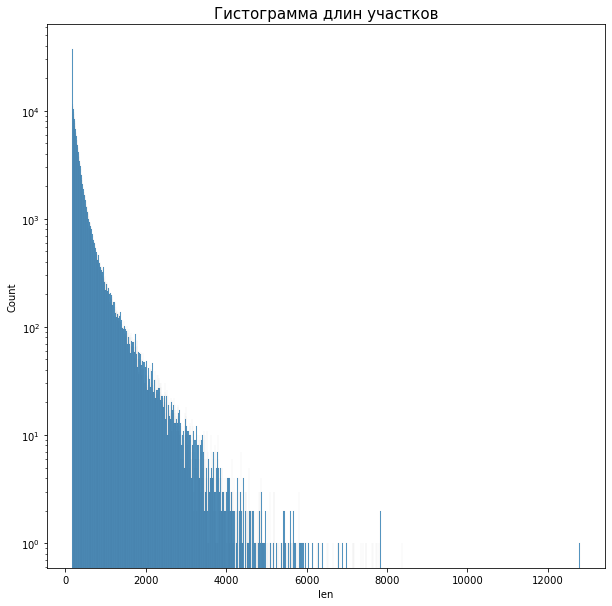

In [12]:
sns.histplot(df2['len']).set(yscale='log')
plt.title("Гистограмма длин участков", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

In [ ]:
!cat H3F3A.ENCFF066CSA_hg19.bed | awk '$3-$2<5000' > H3F3A.ENCFF066CSA_hg19.filtered.bed 
!cat H3F3A.ENCFF343MZY_hg19.bed | awk '$3-$2<4500' > H3F3A.ENCFF343MZY_hg19.filtered.bed 

In [41]:
df.filtered1 = pd.read_csv("H3F3A.ENCFF066CSA_hg19.filtered.bed", header=None, sep='\t')
df.filtered2 = pd.read_csv("H3F3A.ENCFF343MZY_hg19.filtered.bed", header=None, sep='\t')

In [42]:
header = ['chrom', 'start', 'end', 'name', 'score']
df.filtered1.columns = header[:len(df.filtered1.columns)]
df.filtered2.columns = header[:len(df.filtered2.columns)]
df.filtered1['len'] = df.filtered1['end'] - df.filtered1['start']
df.filtered2['len'] = df.filtered2['end'] - df.filtered2['start']

In [43]:
df.filtered1

,chrom,start,end,name,score,len
0,chr10,42596902,42597184,Peak_1,1000,282
1,chr10,42599611,42599966,Peak_2,789,355
2,chr10,42385015,42385306,Peak_3,783,291
3,chr17,41399717,41401163,Peak_4,473,1446
4,chr2,133025670,133025895,Peak_5,282,225
...,...,...,...,...,...,...
375988,chr9,82256497,82256672,Peak_376397,10,175
375989,chr15,65961336,65961511,Peak_376398,10,175
375990,chr12,16266403,16266693,Peak_376399,10,290
375991,chr7,31022146,31022715,Peak_376400,10,569


In [24]:
df1_filter = df1[df1['len'] < 5000]
df2_filter = df2[df2['len'] < 4500]

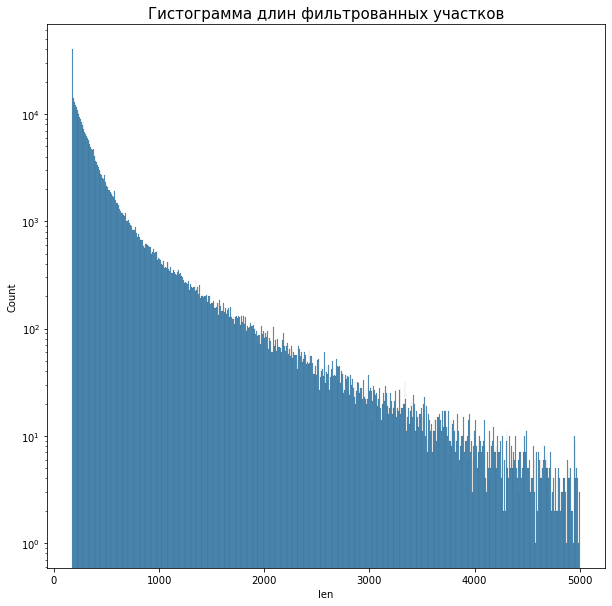

In [44]:
sns.histplot(df.filtered1['len']).set(yscale='log')
plt.title("Гистограмма длин фильтрованных участков", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

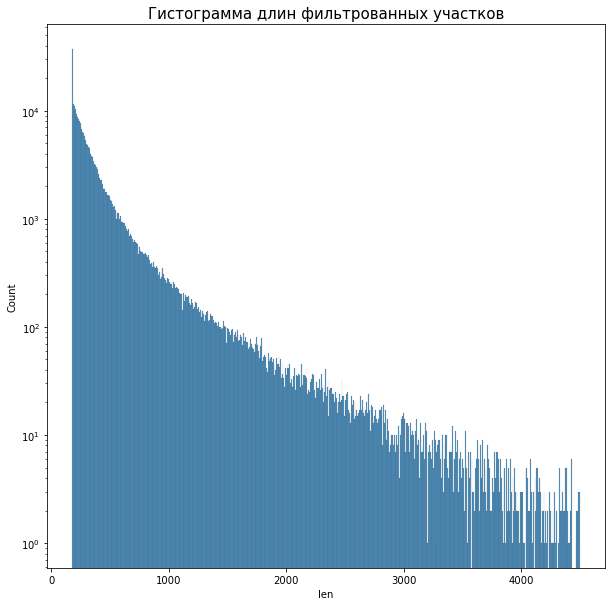

In [45]:
sns.histplot(df.filtered2['len']).set(yscale='log')
plt.title("Гистограмма длин фильтрованных участков", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

In [ ]:
!cat *.filtered.bed | sort -k1,1 -k2,2n | bedtools merge > H3F3A.merge.hg19.bed

In [46]:
!pip install wget
import wget 
wget.download('https://raw.githubusercontent.com/Nazar1997/DeepZ/master/annotation/DeepZ.bed')

100% [............................................................................] 461744 / 461744

'DeepZ.bed'

In [49]:
dfz = pd.read_csv("DeepZ.bed", header=None, sep='\t')
header = ['chrom', 'start', 'end', 'name', 'score']
dfz.columns = header[:len(dfz.columns)]
dfz['len'] = dfz['end'] - dfz['start']
dfz

,chrom,start,end,len
0,chr1,9885,10697,812
1,chr1,10936,11065,129
2,chr1,11102,11440,338
3,chr1,29004,29611,607
4,chr1,564495,565370,875
...,...,...,...,...
19389,chrM,0,1556,1556
19390,chrM,3388,3731,343
19391,chrM,12845,13206,361
19392,chrM,14607,14643,36


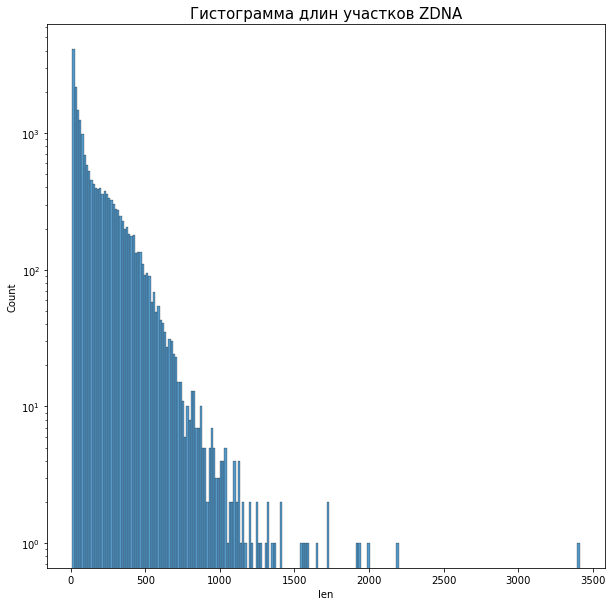

In [50]:
sns.histplot(dfz['len']).set(yscale='log')
plt.title("Гистограмма длин участков ZDNA", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

In [ ]:
!bedtools intersect -a DeepZ.bed -b H3F3A.merge.hg19.bed > H3F3A.intersect_with_DeepZ.bed

In [51]:
data = pd.read_csv("H3F3A.intersect_with_DeepZ.bed", header=None, sep='\t')
header = ['chrom', 'start', 'end', 'name', 'score']
data.columns = header[:len(data.columns)]
data['len'] = data['end'] - data['start']
data

,chrom,start,end,len
0,chr1,934027,934047,20
1,chr1,1004735,1004904,169
2,chr1,1141965,1141990,25
3,chr1,1243681,1243782,101
4,chr1,1310438,1310457,19
...,...,...,...,...
10755,chrX,153990863,153990933,70
10756,chrX,153990948,153990999,51
10757,chrX,154299314,154299354,40
10758,chrX,154299796,154299918,122


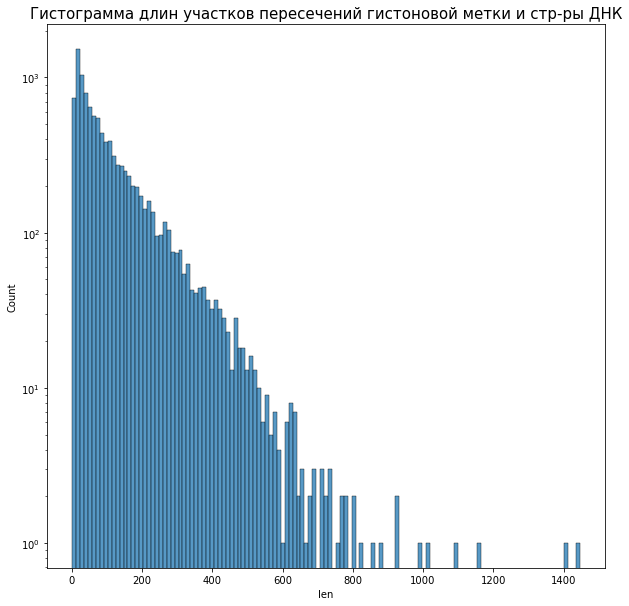

In [52]:
sns.histplot(data['len']).set(yscale='log')
plt.title("Гистограмма длин участков пересечений гистоновой метки и стр-ры ДНК", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()